# ECMWF (IFS and AIFS)

This tutorial demonstrates how to download the ECMWF Open Data Integrated Forecast System (IFS) and Artificial Intelligence IFS (AIFS). 

Recent and archived IFS and AIFS data is freely available from ECMWF in GRIB2 format ([👀 Read more ](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS)).

> "The data that are becoming available are based on a range of high-resolution forecasts (HRES – 9 km horizontal resolution) and ensemble forecasts (ENS – 18 km horizontal resolution).  
> \- [Media Statement](https://www.ecmwf.int/en/about/media-centre/news/2022/ecmwf-makes-wide-range-data-openly-available)

> 29 February 2024: Update from 0.4 degree resolution to 0.25 degree resolution  
> \- [Media Statement](https://www.ecmwf.int/en/about/media-centre/news/2024/ecmwf-releases-much-larger-open-dataset)

## Data Availability

- **Jan 18, 2023**, IFS 0.4 degree resolution first available
- **Feb 1, 2024** IFS 0.25 degree resolution first available
- **Feb 1, 2024** AIFS 0.25 degree resolution first available
- **May ?, 2024** IFS 0.4 degree discontinued.

### Model Types

ECMWF provides data for two different models

1. `model="ifs"` ECMWF Integrated Forecast System
1. `model="aifs"` ECMWF Artificial Intelligence Integrated Forecast System

### Data Source

| `prioriy=` | Data source                                                                  | Archive Duration      |
| ---------- | ---------------------------------------------------------------------------- | --------------------- |
| `"ecmwf"`  | [ECMWF Open Data Server](https://data.ecmwf.int/forecasts/)                  | last 4 days           |
| `"azure"`  | [Microsoft Azure](https://ai4edataeuwest.blob.core.windows.net/ecmwf)        | 2022-01-21 to present |
| `"aws"`    | [Amazon Web Services](https://ecmwf-forecasts.s3.eu-central-1.amazonaws.com) | 2023-01-18 to present |

### Products

> Note: the `aifs` only has the `oper` product.

| `product=` | Product Description                                                                                 | Available model runs       |
| ---------- | --------------------------------------------------------------------------------------------------- | -------------------------- |
| `"oper"`   | operational high-resolution forecast, atmospheric fields                                            | `00z`, `12z`,              |
| `"wave"`   | wave forecasts                                                                                      | `00z`, `12z`,              |
| `"scda"`   | short cut-off high-resolution forecast, atmospheric fields (also known a high-frequency products)", | `06z`, `18z`               |
| `"scwv"`   | short cut-off high-resolution forecast, ocean wave fields (also known a high-frequency products)",  | `06z`, `18z`               |
| `"enfo"`   | ensemble forecast, atmospheric fields                                                               | `00z`, `06z`, `12z`, `18z` |
| `"waef"`   | ensemble forecast, ocean wave fields,                                                               | `00z`, `06z`, `12z`, `18z` |
| `"mmsf"`   | multi-model seasonal forecasts fields from the ECMWF model only.                                    | ?                          |

**Model initialized** at 00z, 06z, 12z, 18z, but not all products are available every hour.


In [1]:
from herbie import Herbie

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

from herbie import paint
from herbie.toolbox import EasyMap, pc

## Integrated Forecast System (IFS)

IFS data is only available at 0.4 degree prior to February 1, 2024. After that date, the IFS is available at 0.25 degree resolution.


In [2]:
H = Herbie("2024-03-1", model="ifs", product="oper", fxx=12)

H.grib, H.idx

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


('https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.grib2',
 'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.index')

In [3]:
# Show the inventory
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,798588,0-798588,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,tp,NaN,sfc,NaN,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
1,2,798588,1327999,798588-1327999,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,r,500,pl,NaN,g,0001,od,fc,oper,:r:500:pl:g:0001:od:fc:oper
2,3,1327999,1817293,1327999-1817293,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,gh,850,pl,NaN,g,0001,od,fc,oper,:gh:850:pl:g:0001:od:fc:oper
3,4,1817293,2534675,1817293-2534675,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,u,925,pl,NaN,g,0001,od,fc,oper,:u:925:pl:g:0001:od:fc:oper
4,5,2534675,3268614,2534675-3268614,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,v,925,pl,NaN,g,0001,od,fc,oper,:v:925:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,58285210,59656192,58285210-59656192,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,250,pl,NaN,g,0001,od,fc,oper,:d:250:pl:g:0001:od:fc:oper
79,80,59656192,59759143,59656192-59759143,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,ro,NaN,sfc,NaN,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
80,81,59759143,61078909,59759143-61078909,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,vo,250,pl,NaN,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
81,82,61078909,62399470,61078909-62399470,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,50,pl,NaN,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


In [5]:
# Show just 10-m U and V wind
H.inventory(":10[u|v]:")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
46,47,28201794,29068335,28201794-29068335,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,10u,NaN,sfc,NaN,g,0001,od,fc,oper,:10u:sfc:g:0001:od:fc:oper
47,48,29068335,29928681,29068335-29928681,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,10v,NaN,sfc,NaN,g,0001,od,fc,oper,:10v:sfc:g:0001:od:fc:oper


In [6]:
# Get 2-m temperature as an xarray Dataset
ds = H.xarray(":2t:", verbose=True)
ds

👨🏻‍🏭 Created directory: [/home/blaylock/data/ifs/20240301]
📇 Download subset: ▌▌Herbie IFS model oper product initialized 2024-Mar-01 00:00 UTC F12 ┊ source=azure                                                            
 cURL from https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.grib2
Found 1 grib messages.
Download subset group 1
  41  :2t:sfc:g:0001:od:fc:oper
curl -s --range 24427114-25090915 "https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240301/00z/ifs/0p25/oper/20240301000000-12h-oper-fc.grib2" > "/home/blaylock/data/ifs/20240301/subset_e0127a9f__20240301000000-12h-oper-fc.grib2"
💾 Saved the subset to /home/blaylock/data/ifs/20240301/subset_e0127a9f__20240301000000-12h-oper-fc.grib2


<xarray.Dataset> Size: 4MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-03-01
    step                 timedelta64[ns] 8B 12:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 8B 2024-03-01T12:00:00
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 4MB 244.9 244.9 ... 224.6
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0127a9f...
    search:                  :2t:

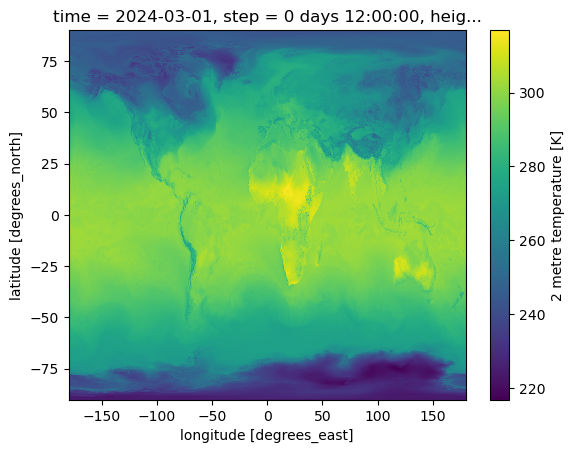

In [7]:
ds.t2m.plot()

### 0.4 degree IFS

Again, the 0.4 degree IFS was available starting January 2023, but will be discontinued in May 2024 in favor of the 0.25 degree data. You can still access these files as long as they exist.


In [8]:
# Accessing historical
H = Herbie("2023-07-04", model="ifs", product="oper", fxx=12)
H.grib

✅ Found ┊ model=ifs ┊ product=oper ┊ 2023-Jul-04 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20230704/00z/0p4-beta/oper/20230704000000-12h-oper-fc.grib2'

## Eccodes-style Index Files

The ECMWF index files are different than the wgrib2-style index files, so pay close attention to how you should select the field you want.


In [9]:
H = Herbie("2024-03-1", model="ifs", product="oper", fxx=12)

# Show the search_help
print(H.search_help)

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure

Use regular expression to search for lines in the index file.
Here are some examples you can use for the ecCodes-style `search`

Look at the ECMWF GRIB Parameter Database
https://apps.ecmwf.int/codes/grib/param-db


product=`oper` or `enfo`
======================== ==============================================
search=                  GRIB messages that will be downloaded
======================== ==============================================
":2t:"                   2-m temperature
":2d:"                   2-m dew point temperature
":10u:"                  10-m u wind vector
":10v:"                  10-m v wind vector
":10[uv]:                10-m u and 10-m v wind
":[tuvr]:"               Temp, u/v wind, RH (all levels)
":500:"                  All variables on the 500 hPa level
":gh:500"                Geopotential height only at 500 hPa
":gh:"                   Geopotential height (all pr

When considering search queries, pay attention to the "search_this" column; that columns is used for the regex search.


In [10]:
H.inventory()

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,798588,0-798588,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,tp,NaN,sfc,NaN,g,0001,od,fc,oper,:tp:sfc:g:0001:od:fc:oper
1,2,798588,1327999,798588-1327999,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,r,500,pl,NaN,g,0001,od,fc,oper,:r:500:pl:g:0001:od:fc:oper
2,3,1327999,1817293,1327999-1817293,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,gh,850,pl,NaN,g,0001,od,fc,oper,:gh:850:pl:g:0001:od:fc:oper
3,4,1817293,2534675,1817293-2534675,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,u,925,pl,NaN,g,0001,od,fc,oper,:u:925:pl:g:0001:od:fc:oper
4,5,2534675,3268614,2534675-3268614,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,v,925,pl,NaN,g,0001,od,fc,oper,:v:925:pl:g:0001:od:fc:oper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,58285210,59656192,58285210-59656192,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,250,pl,NaN,g,0001,od,fc,oper,:d:250:pl:g:0001:od:fc:oper
79,80,59656192,59759143,59656192-59759143,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,ro,NaN,sfc,NaN,g,0001,od,fc,oper,:ro:sfc:g:0001:od:fc:oper
80,81,59759143,61078909,59759143-61078909,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,vo,250,pl,NaN,g,0001,od,fc,oper,:vo:250:pl:g:0001:od:fc:oper
81,82,61078909,62399470,61078909-62399470,2024-03-01,2024-03-01 12:00:00,0 days 12:00:00,d,50,pl,NaN,g,0001,od,fc,oper,:d:50:pl:g:0001:od:fc:oper


In [18]:
H.inventory().param.unique()

array(['tp', 'msl', '2t', '10u', 'gh', 't', 'u', 'v', 'st', 'r', 'skt',
       'sp', 'lsm', '10v', 'tcwv', 'q', 'd', 'vo', 'ro'], dtype=object)

Ok, now that we have some understanding of the index file, we can read the 2-m temperature data.


In [11]:
ds = H.xarray(":2t:")
ds

<xarray.Dataset> Size: 4MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-03-01
    step                 timedelta64[ns] 8B 12:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 8B 2024-03-01T12:00:00
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 4MB 244.9 244.9 ... 224.6
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0127a9f...
    search:                  :2t:

Text(1.0, 1.0, '2 metre temperature')

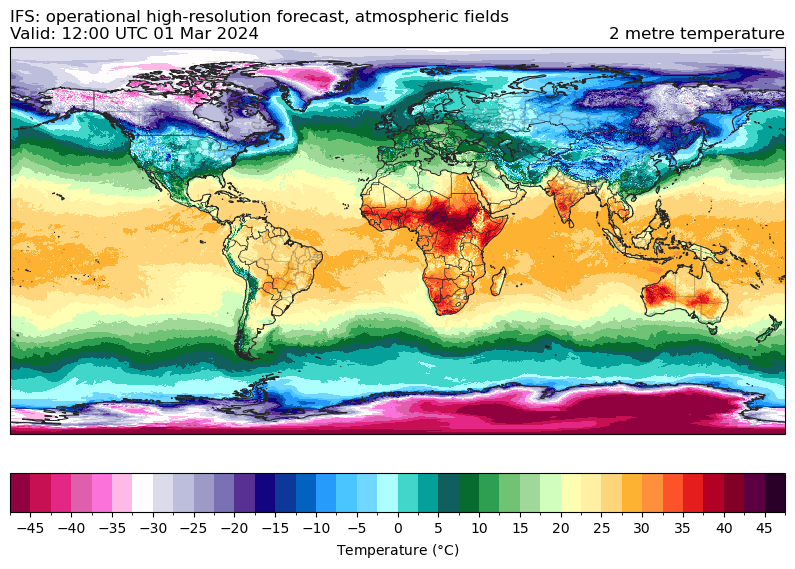

In [12]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.t2m - 273.15,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSTemperature.cbar_kwargs2
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.t2m.GRIB_name, loc="right")

Now the same, but for wind. Use the Herbie accessor to compute wind speed and direction.


In [14]:
H = Herbie("2024-03-01", model="ifs", product="oper")

# Get u and v wind component
ds = H.xarray(":10[u|v]:").herbie.with_wind()
ds

✅ Found ┊ model=ifs ┊ product=oper ┊ 2024-Mar-01 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


<xarray.Dataset> Size: 17MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-03-01
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 10.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 8B 2024-03-01
    gribfile_projection  object 8B None
Data variables:
    u10                  (latitude, longitude) float32 4MB 1.654 ... -1.237
    v10                  (latitude, longitude) float32 4MB 0.9546 ... 2.361
    si10                 (latitude, longitude) float32 4MB 1.909 1.909 ... 2.665
    wdir10               (latitude, longitude) float32 4MB 240.0 240.0 ... 152.3
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0ef1f8f...
    search:                  :10[u|v]:

Text(1.0, 1.0, 'wind_speed')

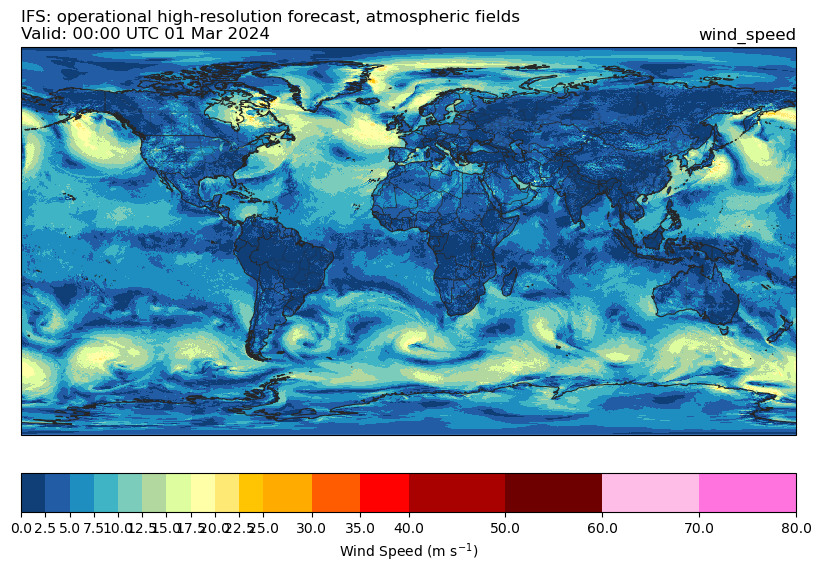

In [16]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude, ds.latitude, ds.si10, transform=pc, **paint.NWSWindSpeed.kwargs2
)
plt.colorbar(
    p, ax=ax, orientation="horizontal", pad=0.05, **paint.NWSWindSpeed.cbar_kwargs2
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.si10.standard_name, loc="right")

Now lets get the humidity and geopotential height at 500 hPa


In [17]:
ds = H.xarray(":(?:q|gh):500")
ds

<xarray.Dataset> Size: 8MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-03-01
    step                 timedelta64[ns] 8B 00:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 8B 2024-03-01
    gribfile_projection  object 8B None
Data variables:
    q                    (latitude, longitude) float32 4MB 0.0001736 ... 0.00...
    gh                   (latitude, longitude) float32 4MB 5.196e+03 ... 4.89...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20240301/subset_e0efbf07...
    search:                  :(?:q|gh):500

Text(1.0, 1.0, '500.0 hPa\nSpecific humidity/Geopotential height')

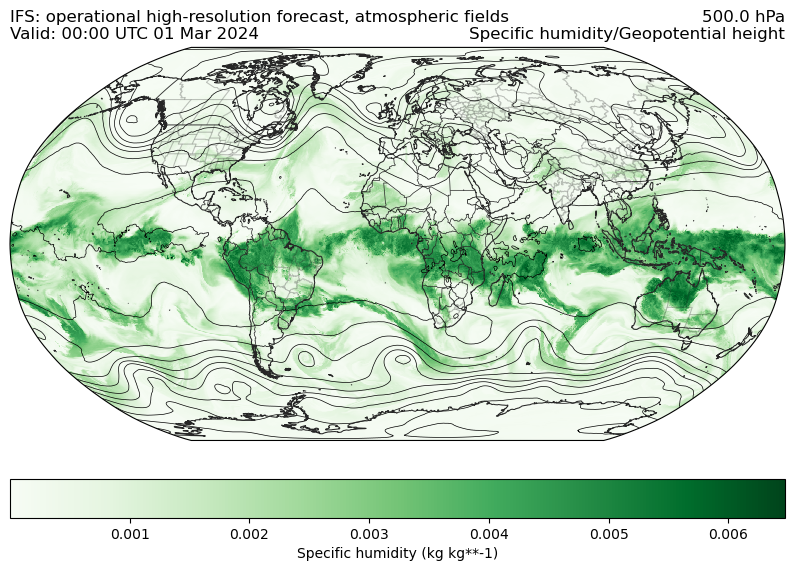

: 

In [19]:
# NOTE: transforming data to a Robinson projection can take some time...
ax = EasyMap("50m", crs=ccrs.Robinson(), figsize=[10, 10]).STATES().BORDERS().ax


# Color shade by specific humidity
p = ax.pcolormesh(ds.longitude, ds.latitude, ds.q, transform=pc, cmap="Greens")

plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    label=f"{ds.q.GRIB_name} ({ds.q.units})",
)

# Contours for geopotential height
ax.contour(
    ds.longitude,
    ds.latitude,
    ds.gh,
    transform=pc,
    colors="k",
    linewidths=0.5,
    levels=range(0, 10_000, 60 * 2),
)


ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(
    f"{ds.isobaricInhPa.item()} {ds.isobaricInhPa.units}\n{ds.q.GRIB_name}/{ds.gh.GRIB_name}",
    loc="right",
)

## ECMWF IFS Wave Output


In [2]:
H = Herbie("2022-01-26 00:00", model="ifs", product="wave")

✅ Found ┊ model=ifs ┊ product=wave ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


In [3]:
ds = H.xarray(None, verbose=True)
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:1102: UserWarning: Will not remove GRIB file because Herbie will only remove subsetted files (not full files).
  warnings.warn(


✅ Success! Downloaded IFS from azure               
	src: https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/wave/20220126000000-0h-wave-fc.grib2
	dst: /home/blaylock/data/ifs/20220126/20220126000000-0h-wave-fc.grib2


<xarray.Dataset> Size: 8MB
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 8B 2022-01-26
    step                 timedelta64[ns] 8B 00:00:00
    meanSea              float64 8B 0.0
  * latitude             (latitude) float64 4kB 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude            (longitude) float64 7kB -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 8B 2022-01-26
    gribfile_projection  object 8B None
Data variables:
    mp2                  (latitude, longitude) float32 2MB ...
    swh                  (latitude, longitude) float32 2MB ...
    mwd                  (latitude, longitude) float32 2MB ...
    pp1d                 (latitude, longitude) float32 2MB ...
    mwp                  (latitude, longitude) float32 2MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 wave
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             /home/blaylock/data/ifs/20220126/20220126000000-...
    local_grib:              /home/blaylock/data/ifs/20220126/20220126000000-...
    search:                  None

Text(1.0, 1.0, 'Significant height of combined wind waves and swell')

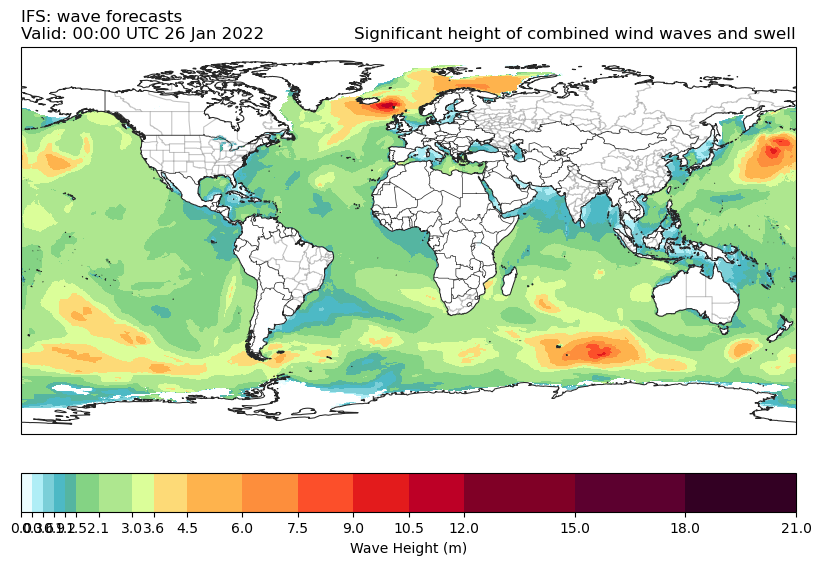

In [4]:
ax = EasyMap("50m", crs=ds.herbie.crs, figsize=[10, 10]).STATES().BORDERS().ax
p = ax.pcolormesh(
    ds.longitude,
    ds.latitude,
    ds.swh,
    transform=pc,
    **paint.NWSWaveHeight.kwargs2,
)
plt.colorbar(
    p,
    ax=ax,
    orientation="horizontal",
    pad=0.05,
    **paint.NWSWaveHeight.cbar_kwargs2,
)

ax.set_title(
    f"{ds.model.upper()}: {H.product_description}\nValid: {ds.valid_time.dt.strftime('%H:%M UTC %d %b %Y').item()}",
    loc="left",
)
ax.set_title(ds.swh.GRIB_name, loc="right")

## Ensemble Forecast Products


In [5]:
H = Herbie("2022-01-26 00:00", model="ifs", product="enfo")
ds = H.xarray(":2t:")
ds

✅ Found ┊ model=ifs ┊ product=enfo ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure
Note: Returning a list of [2] xarray.Datasets because cfgrib opened with multiple hypercubes.


[<xarray.Dataset> Size: 81MB
 Dimensions:              (number: 50, latitude: 451, longitude: 900)
 Coordinates:
   * number               (number) int64 400B 1 2 3 4 5 6 7 ... 45 46 47 48 49 50
     time                 datetime64[ns] 8B 2022-01-26
     step                 timedelta64[ns] 8B 00:00:00
     heightAboveGround    float64 8B 2.0
   * latitude             (latitude) float64 4kB 90.0 89.6 89.2 ... -89.6 -90.0
   * longitude            (longitude) float64 7kB -180.0 -179.6 ... 179.2 179.6
     valid_time           datetime64[ns] 8B 2022-01-26
     gribfile_projection  object 8B None
 Data variables:
     t2m                  (number, latitude, longitude) float32 81MB 246.5 ......
 Attributes:
     GRIB_edition:            2
     GRIB_centre:             ecmf
     GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
     GRIB_subCentre:          0
     Conventions:             CF-1.7
     institution:             European Centre for Medium-Range Weather

In [6]:
# Dataset with all 50 members
ds[0]

<xarray.Dataset> Size: 81MB
Dimensions:              (number: 50, latitude: 451, longitude: 900)
Coordinates:
  * number               (number) int64 400B 1 2 3 4 5 6 7 ... 45 46 47 48 49 50
    time                 datetime64[ns] 8B 2022-01-26
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 4kB 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude            (longitude) float64 7kB -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 8B 2022-01-26
    gribfile_projection  object 8B None
Data variables:
    t2m                  (number, latitude, longitude) float32 81MB 246.5 ......
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 enfo
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20220126/subset_bfef7f9f...
    search:                  :2t:

In [7]:
# This Dataset is of the mean of all the members, right?
ds[1]

<xarray.Dataset> Size: 2MB
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    number               int64 8B 0
    time                 datetime64[ns] 8B 2022-01-26
    step                 timedelta64[ns] 8B 00:00:00
    heightAboveGround    float64 8B 2.0
  * latitude             (latitude) float64 4kB 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude            (longitude) float64 7kB -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 8B 2022-01-26
    gribfile_projection  object 8B None
Data variables:
    t2m                  (latitude, longitude) float32 2MB 246.2 246.2 ... 246.3
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 enfo
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20220126/subset_bfef7f9f...
    search:                  :2t:

In [8]:
H.idx

'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20220126/00z/0p4-beta/enfo/20220126000000-0h-enfo-ef.index'

## Ensemble Wave Products


In [16]:
H = Herbie("2022-01-26 00:00", model="ifs", product="waef")
H.inventory()

✅ Found ┊ model=ifs ┊ product=waef ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,501693,0-501693,2022-01-26,2022-01-26,0 days,swh,NaN,sfc,38,g,0001,od,pf,waef,:swh:sfc:38:g:0001:od:pf:waef
1,2,501693,1003064,501693-1003064,2022-01-26,2022-01-26,0 days,swh,NaN,sfc,46,g,0001,od,pf,waef,:swh:sfc:46:g:0001:od:pf:waef
2,3,1003064,1504757,1003064-1504757,2022-01-26,2022-01-26,0 days,swh,NaN,sfc,43,g,0001,od,pf,waef,:swh:sfc:43:g:0001:od:pf:waef
3,4,1504757,2006096,1504757-2006096,2022-01-26,2022-01-26,0 days,swh,NaN,sfc,40,g,0001,od,pf,waef,:swh:sfc:40:g:0001:od:pf:waef
4,5,2006096,2507435,2006096-2507435,2022-01-26,2022-01-26,0 days,swh,NaN,sfc,NaN,g,0001,od,cf,waef,:swh:sfc:g:0001:od:cf:waef
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,251,125340988,125842349,125340988-125842349,2022-01-26,2022-01-26,0 days,pp1d,NaN,sfc,7,g,0001,od,pf,waef,:pp1d:sfc:7:g:0001:od:pf:waef
251,252,125842349,126343438,125842349-126343438,2022-01-26,2022-01-26,0 days,pp1d,NaN,sfc,29,g,0001,od,pf,waef,:pp1d:sfc:29:g:0001:od:pf:waef
252,253,126343438,126844527,126343438-126844527,2022-01-26,2022-01-26,0 days,pp1d,NaN,sfc,34,g,0001,od,pf,waef,:pp1d:sfc:34:g:0001:od:pf:waef
253,254,126844527,127345908,126844527-127345908,2022-01-26,2022-01-26,0 days,pp1d,NaN,sfc,NaN,g,0001,od,cf,waef,:pp1d:sfc:g:0001:od:cf:waef


In [18]:
H = Herbie("2022-01-26", model="ifs", product="enfo")
H.inventory()

✅ Found ┊ model=ifs ┊ product=enfo ┊ 2022-Jan-26 00:00 UTC F00 ┊ GRIB2 @ azure ┊ IDX @ azure


,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
0,1,0,609069,0-609069,2022-01-26,2022-01-26,0 days,2t,NaN,sfc,29,g,0001,od,pf,enfo,:2t:sfc:29:g:0001:od:pf:enfo
1,2,609069,1218138,609069-1218138,2022-01-26,2022-01-26,0 days,10u,NaN,sfc,27,g,0001,od,pf,enfo,:10u:sfc:27:g:0001:od:pf:enfo
2,3,1218138,1827207,1218138-1827207,2022-01-26,2022-01-26,0 days,10v,NaN,sfc,14,g,0001,od,pf,enfo,:10v:sfc:14:g:0001:od:pf:enfo
3,4,1827207,2436276,1827207-2436276,2022-01-26,2022-01-26,0 days,2t,NaN,sfc,2,g,0001,od,pf,enfo,:2t:sfc:2:g:0001:od:pf:enfo
4,5,2436276,3045345,2436276-3045345,2022-01-26,2022-01-26,0 days,10u,NaN,sfc,43,g,0001,od,pf,enfo,:10u:sfc:43:g:0001:od:pf:enfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4177,4178,2574120261,2574932280,2574120261-2574932280,2022-01-26,2022-01-26,0 days,d,200,pl,20,g,0001,od,pf,enfo,:d:200:pl:20:g:0001:od:pf:enfo
4178,4179,2574932280,2575744299,2574932280-2575744299,2022-01-26,2022-01-26,0 days,d,200,pl,41,g,0001,od,pf,enfo,:d:200:pl:41:g:0001:od:pf:enfo
4179,4180,2575744299,2576556318,2575744299-2576556318,2022-01-26,2022-01-26,0 days,d,200,pl,4,g,0001,od,pf,enfo,:d:200:pl:4:g:0001:od:pf:enfo
4180,4181,2576556318,2577368337,2576556318-2577368337,2022-01-26,2022-01-26,0 days,d,200,pl,50,g,0001,od,pf,enfo,:d:200:pl:50:g:0001:od:pf:enfo


Here is another examle, just for fun


In [21]:
H = Herbie("2022-01-26", model="ifs", product="oper", fxx=12)
H

✅ Found ┊ model=ifs ┊ product=oper ┊ 2022-Jan-26 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


▌▌Herbie IFS model oper product initialized 2022-Jan-26 00:00 UTC F12 ┊ source=azure

In [22]:
# Download just the 10-m u and v winds
ds = H.download(search=":10(u|v):")
ds

/home/blaylock/GITHUB/Herbie/herbie/core.py:808: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(search)


PosixPath('/home/blaylock/data/ifs/20220126/subset_bf121a77__20220126000000-12h-oper-fc.grib2')

In [23]:
# Retrieve the 500 hPa temperature as an xarray.Dataset
ds = H.xarray(search=":t:500:")
ds

<xarray.Dataset> Size: 2MB
Dimensions:              (latitude: 451, longitude: 900)
Coordinates:
    time                 datetime64[ns] 8B 2022-01-26
    step                 timedelta64[ns] 8B 12:00:00
    isobaricInhPa        float64 8B 500.0
  * latitude             (latitude) float64 4kB 90.0 89.6 89.2 ... -89.6 -90.0
  * longitude            (longitude) float64 7kB -180.0 -179.6 ... 179.2 179.6
    valid_time           datetime64[ns] 8B 2022-01-26T12:00:00
    gribfile_projection  object 8B None
Data variables:
    t                    (latitude, longitude) float32 2MB 234.9 234.9 ... 242.5
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   ifs
    product:                 oper
    description:             ECMWF Open Data - Integrated Forecast System
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/ifs/20220126/subset_bf124169...
    search:                  :t:500:

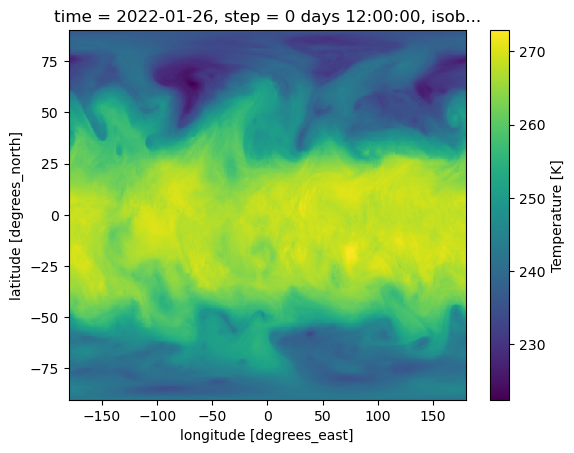

In [24]:
ds.t.plot()

## Artificial Intelligence IFS

Download and plot ECMWF AIFS model data.

> ⚠ AIFS GRIB files before **March 13, 2024**, seemed to be encoded incorrectly as they are read as a vector instead of a grid. I'm not sure how this data can be recovered or reshaped.


In [29]:
H = Herbie("2024-06-11", model="aifs", product="oper", fxx=12)

H.grib, H.idx

✅ Found ┊ model=aifs ┊ product=oper ┊ 2024-Jun-11 00:00 UTC F12 ┊ GRIB2 @ azure ┊ IDX @ azure


('https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240611/00z/aifs/0p25/oper/20240611000000-12h-oper-fc.grib2',
 'https://ai4edataeuwest.blob.core.windows.net/ecmwf/20240611/00z/aifs/0p25/oper/20240611000000-12h-oper-fc.index')

In [30]:
H.inventory(":t:850")

,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
32,33,25515811,26027206,25515811-26027206,2024-06-11,2024-06-11 12:00:00,0 days 12:00:00,t,850,pl,NaN,g,0001,ai,fc,oper,:t:850:pl:g:0001:ai:fc:oper


<xarray.Dataset> Size: 4MB
Dimensions:              (latitude: 721, longitude: 1440)
Coordinates:
    time                 datetime64[ns] 8B 2024-06-11
    step                 timedelta64[ns] 8B 12:00:00
    isobaricInhPa        float64 8B 850.0
  * latitude             (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude            (longitude) float64 12kB -180.0 -179.8 ... 179.5 179.8
    valid_time           datetime64[ns] 8B 2024-06-11T12:00:00
    gribfile_projection  object 8B None
Data variables:
    t                    (latitude, longitude) float32 4MB 271.1 271.1 ... 235.1
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    model:                   aifs
    product:                 oper
    description:             ECMWF Open Data - Artificial Inteligence Integra...
    remote_grib:             https://ai4edataeuwest.blob.core.windows.net/ecm...
    local_grib:              /home/blaylock/data/aifs/20240611/subset_f812da9...
    search:                  :t:850

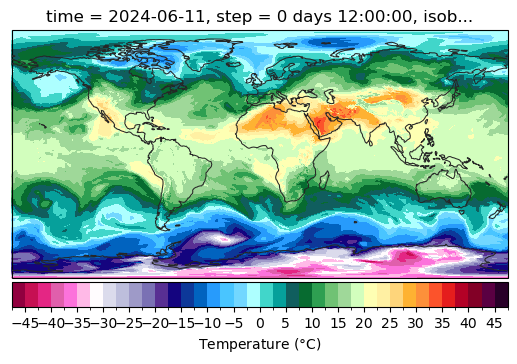

In [42]:
ds = H.xarray(":t:850")
(ds.t - 273.15).plot(
    x="longitude",
    y="latitude",
    ax=EasyMap().ax,
    transform=pc,
    **paint.NWSTemperature.kwargs2,
    cbar_kwargs=paint.NWSTemperature.cbar_kwargs2
    | dict(orientation="horizontal", pad=0.01),
)
ds

### AIFS Ensembles
The AIFS ensemble directories contain both the individual ensemble members and the control run. To address this, the user can specify the keyword argument `product_suffix` when creating the Herbie object with a value of `cf` to access the control run. The default value is `pf`, which will give all individual ensemble members.

In [14]:
# AIFS ensemble individual members
H = Herbie("2025-07-02-00", model="aifs", product="enfo", fxx=6)
H.inventory("2t")

✅ Found ┊ model=aifs ┊ product=enfo ┊ 2025-Jul-02 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
119,120,103266930,103890654,103266930-103890654,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,34,g,0001,ai,pf,enfo,:2t:sfc:34:g:0001:ai:pf:enfo
186,187,158285723,158909113,158285723-158909113,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,33,g,0001,ai,pf,enfo,:2t:sfc:33:g:0001:ai:pf:enfo
267,268,224267267,224890367,224267267-224890367,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,32,g,0001,ai,pf,enfo,:2t:sfc:32:g:0001:ai:pf:enfo
329,330,283034283,283657319,283034283-283657319,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,31,g,0001,ai,pf,enfo,:2t:sfc:31:g:0001:ai:pf:enfo
337,338,291249929,291873821,291249929-291873821,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,7,g,0001,ai,pf,enfo,:2t:sfc:7:g:0001:ai:pf:enfo
450,451,385591466,386214503,385591466-386214503,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,30,g,0001,ai,pf,enfo,:2t:sfc:30:g:0001:ai:pf:enfo
509,510,434957178,435581267,434957178-435581267,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,6,g,0001,ai,pf,enfo,:2t:sfc:6:g:0001:ai:pf:enfo
552,553,470979808,471602901,470979808-471602901,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,16,g,0001,ai,pf,enfo,:2t:sfc:16:g:0001:ai:pf:enfo
563,564,480734509,481358971,480734509-481358971,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,3,g,0001,ai,pf,enfo,:2t:sfc:3:g:0001:ai:pf:enfo
577,578,493639241,494262626,493639241-494262626,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,50,g,0001,ai,pf,enfo,:2t:sfc:50:g:0001:ai:pf:enfo


In [15]:
# AIFS ensemble control run
H = Herbie("2025-07-02-00", model="aifs", product="enfo", product_suffix="cf", fxx=6)
H.inventory("2t")

✅ Found ┊ model=aifs ┊ product=enfo ┊ 2025-Jul-02 00:00 UTC F06 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,step,param,levelist,levtype,number,domain,expver,class,type,stream,search_this
39,40,30703976,31316693,30703976-31316693,2025-07-02,2025-07-02 06:00:00,0 days 06:00:00,2t,NaN,sfc,NaN,g,0001,ai,cf,enfo,:2t:sfc:g:0001:ai:cf:enfo


---

**[Attribution](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data:+real-time+forecasts+from+IFS+and+AIFS#ECMWFopendata:realtimeforecastsfromIFSandAIFS-DownloadASingleFieldWithWgetDownloadasinglefieldwithwget)**

- Copyright statement: Copyright "© 2022 European Centre for Medium-Range Weather Forecasts (ECMWF)".
- Source www.ecmwf.int
- Licence Statement: This data is published under a Creative Commons Attribution 4.0 International (CC BY 4.0). https://creativecommons.org/licenses/by/4.0/
- Disclaimer: ECMWF does not accept any liability whatsoever for any error or omission in the data, their availability, or for any loss or damage arising from their use.
